#AJUSTE DATOS. CURVA DE ROTACIÓN DE GALAXIAS.
ENTREGABLE. ASIGNATURA: TÉCNICAS COMPUTACIONALES BÁSICAS. 
AUTOR: GONZALO MARRERO RAMALLO
FECHA: 14/12/2022


## 1. Objetivo: 

Se realizará un ajuste de datos utilizando uno de los métodos que estudiamos en clase. La tarea incluye:
- Calcular los parámetros y sus errores.
- Calcular la varianza residual.
- Determinar la fracción de varianza en los datos que está explicada por la regresión.
- Graficar el resultado.
Una vez conseguido el ajuste, se grafica el resultado y guardar la figura en un archivo que subirán al aula virtual, junto con el código que han desarrollado para el ajuste.  


## 2. Elección de los datos para realizar el ajuste:

En este caso, se ha seleccionado la opción *A) CURVAS DE ROTACIÓN DE GALAXIAS*

# DESARROLLO DEL CÓDIGO

In [ ]:
#Será necesario cargar el paquete astropy

In [1]:
#!pip install astropy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Se cargan los paquetes necesarios
from astropy.io.ascii import read
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# Se carga los datos de la galaxia.
myfile = read('data/GALAXIA7331.txt')

In [4]:
# Se leen las columnas que queremos graficar X e Y. 
xx = myfile['R'] #El radio está en Kpc
yy = myfile['V'] #La velocidad en (Km/h)

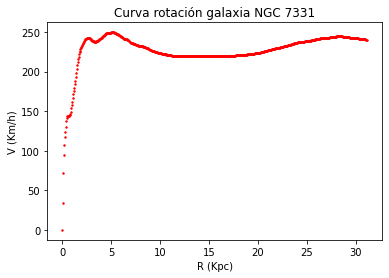

In [5]:
#Se representan los datos, para comprobar su dispersión
plt.scatter(xx,yy, s=2, color='r')
plt.title('Curva rotación galaxia NGC 7331')
plt.xlabel("R (Kpc)")
plt.ylabel("V (Km/h)")
plt.show()

## Ejemplo de ajuste lineal

Visualizando el gráfico, una función lineal no va a replicar el modelo. Aún así, vemos como sería: 
El ajuste lineal requiere calcular los parámetros a y b que definen el y = a + bx

In [6]:
#Se crean los sumatorios para 'a' y 'b'.

nn = len(xx)
sumx = np.sum(xx)
sumy = np.sum(yy)
sumx2 = np.sum(xx**2)
sumy2 = np.sum(yy**2)
sumxy = np.sum(xx*yy)

In [7]:
#Los parámetros son: 
aa = (sumy*sumx2-sumxy*sumx)/(nn*sumx2-sumx**2)
bb= (nn*sumxy-sumx*sumy)/(nn*sumx2-sumx**2)
print("a=", str(aa))
print("b=", str(bb))

a= 212.19197341994865
b= 0.9575862303938828


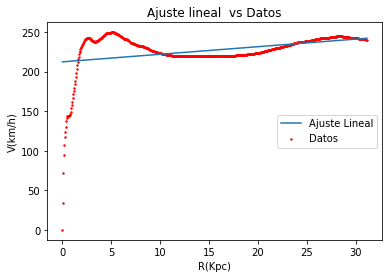

In [9]:
#Se grafica la función de regresión encima del gráfico de dispersión, para evaluar visualmente, la bondad del ajuste
plt.scatter(xx,yy, s=2, color='r', label = "Datos")
plt.figure(1)
plt.xlabel("R(Kpc)")
plt.ylabel("V(km/h)")
plt.title("Ajuste lineal  vs Datos")
plt.plot(xx, aa+bb*xx, label = "Ajuste Lineal") # Se grafica el ajuste lineal. 
plt.legend(loc='center right')
plt.show() # Esperamos ver una línea recta

In [10]:
#Se procede a calcular los parámetros del modelo de ajuste lineal:
#varianza, covarianza, pearson, y coeficiente de determinación:
covariance = (nn*sumxy-sumx*sumy)/(nn-1)
variancex = (nn*sumx2-sumx**2)/(nn-1)
variancey = (nn*sumy2-sumy**2)/(nn-1)
pearson = covariance/(np.sqrt(variancex)*np.sqrt(variancey))
determinacion = (pearson**2)*100
print("R2=", '{:.2f}'.format(determinacion), "%")

R2= 13.29 %


Nos da un coeficiente R2 muy bajo. Hay gran parte de la varianza en Y que la regresión no puede explicar. Esto indica que necesitaremos una regresión polinomial.

## Regresión polinomial por mínimos cuadrados

In [12]:
# Definición de la matriz traspuesta (f)*f:
ftf =np.array([[nn, sumx],[sumx,sumx2]])
# Definición de transpose (f)*y:
fty = np.array([sumy, sumxy])
#Se invoca al solver:
solutionlineal = np.linalg.solve(ftf,fty)
# Se compara la solución con el ajuste que calculamos por regla de Cramer:
print("aa=", str(solutionlineal[0]))
print("bb=", str(solutionlineal[1]))
# Nos debe salir los mismos valores que aplicando la regla de Cramer.


aa= 212.1919734199486
bb= 0.9575862303938837


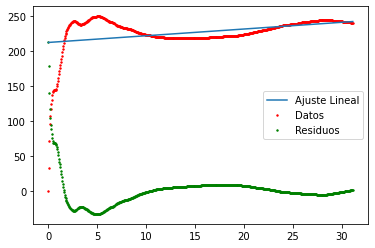

In [13]:
# Valores Y predichos por el ajuste lineal:
yypredlinear = solutionlineal[0]+ solutionlineal[1]*xx
residuals = yypredlinear - yy
plt.figure(2)
plt.scatter(xx,yy, s=2, color='r', label = "Datos")
plt.scatter(xx, residuals, s=2,color='g', label = "Residuos")
plt.plot(xx, aa+bb*xx, label = "Ajuste Lineal")
plt.legend(loc='center right')
plt.show()
# Si se ajustase bien por linealidad, no deberíamos ver una dependencia. En este caso, no es así. 
# Esto nos sugiere utilizar un número mayor de parámetros. 

In [ ]:
## Criterio para cuantificar el nº óptimo de parámetros libres. (Navaja de Ockham)

# BIC. Criterio de información Bayesiano.

# El ajuste óptimo es el que devuelve el BIC mínimo.

In [14]:
# Definimos el nº de parámetros libres: 
pp = 2
# Varianza residual del ajuste lineal:
sigmar2linear = np.sum((yy-yypredlinear)**2)/(nn-pp)
print(str(sigmar2linear))
#BIC del ajuste lineal: 
biclinear = nn*np.log(sigmar2linear*(nn-pp)/nn)+pp*np.log(nn)
print("B(linear)", str(biclinear))

486.90851876084633
B(linear) 3872.2286743284267


In [ ]:
# Procedemos a ajustar una parábola a los datos (polinomio de orden 2) y ver que sucede.

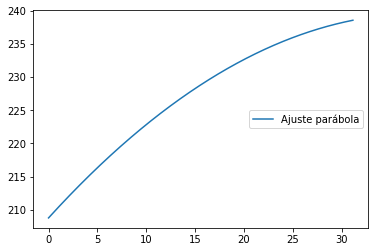

In [17]:
# Se definen las sumatorias.
sumx3 = np.sum(xx**3)
sumx4 = np.sum(xx**4)
sumx2y = np.sum(xx**2*yy)
# Se definen las matrices:
ftf = np.array([[nn, sumx, sumx2], [sumx, sumx2, sumx3],[sumx2, sumx3, sumx4]])
fty = np.array([sumy, sumxy, sumx2y])
#Se realiza el ajuste:
solutionorden2 = np.linalg.solve(ftf, fty)
#Se define la función parabólica:
yparabola = solutionorden2[0] + solutionorden2[1]*xx + solutionorden2[2]*xx**2
#Cálculo de los residuos:
residuals2 = yparabola - yy
#Se grafica el resultado (Datos, modelo y residuos):
plt.figure(1)
plt.scatter(xx,yy, s=2, color='r', label = "Datos")
plt.plot(xx, yparabola, label = "Ajuste parábola")
plt.scatter(xx, residuals2, s=2,color='g', label = "Residuos")
plt.legend(loc='center right')
plt.show()
# Se visualiza la parábola, pero obviamente necesitamos un polinomio de mayor orden.


In [18]:
pp = 3 # nº de parámetros libres.
yypredparabola = solutionorden2[0]+solutionorden2[1]*xx+solutionorden2[2]*xx**2 # Se calcula la varianza residual.
sigmar2parabola = np.sum((yy-yypredparabola)**2)/(nn-pp)
#Se calcula el BIC:
bicparabola = nn*np.log(sigmar2parabola*(nn-pp)/nn)+pp*np.log(nn)
print("BIC (parabola)", str(bicparabola)) # Nos devuelve un BIC mayor


BIC (parabola) 3875.5898713033034


## Implementación de código para la creación de la matriz Hessiana para un polinomio de orden m.

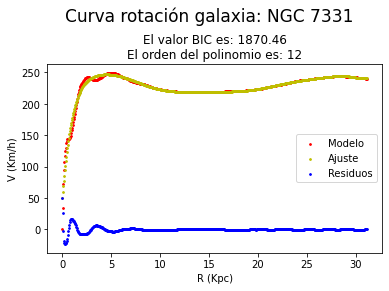

In [28]:
# Automatización del código para que calcule las matrices para un polinomio de grado m:#
# m = orden del polinomio
# Se definen las sumatorias. Hasta 2*m, para la matriz ftf:
m=12 #Orden del polinomio. Ingresaremos el orden del polinomio que queremos calcular.
ftfajuste=[] # Sumatorias de elementos xx^i, donde i es el exponente
# Se crea el loop para crear la matriz ftf:
for i in range(m):
  for j in range(i,m+i):
    sumxn=np.sum(xx**j)
    ftfajuste.append(sumxn) # Se va rellenando el array con cada elemento.
#Se implementa código para que los elementos se dispongan en la matriz cuadrada m x m:
n_col = int(np.sqrt(len(ftfajuste))) # Raiz cuadrada de la longitud del array. Devuelve la dimensión de la matriz.
temp = ftfajuste # Lo almacenamos en una variable temporal.
ftfajuste = [] # Creamos el array vacío, para ir rellenando.

# Se crea un bucle while para que se dispongan los elementos. De esta manera podemos aplicar el solver más adelante
# La matriz ftf tendrá la misma dimensión que el array fty, para que se pueda operar.
while temp != []: 
    ftfajuste.append(temp[:n_col])
    temp = temp[n_col:]

# Se crea el loop para crear la matriz fty:
ftyajuste=[]

for i in range(m):  #Se crea el loop hasta el rango de (m = orden del polinomio).
  sumxy=np.sum(xx**i*yy)
  i+=1
  ftyajuste.append(sumxy)

#Se resuelve el ajuste, con el comando linalg.solve:
solajuste=np.linalg.solve(ftfajuste,ftyajuste)
# Definimos el número de parámetros libres:
pp = m+1 # Será igual al orden del polinomio +1
# El mejor ajuste será el de menor número de parámetros libres.

# Se calcula la "y" predicción:

valueprediccion = [] #Se crea array vacío.
for w in range(m): #Loop para recorrer hasta el rango de m.
  valueprediccion.append(solajuste[w]*xx**w) # Se va añadiendo el elemento 

yyprediccion = sum(valueprediccion) # Se suma todo, para obtener la yyprediccion

# Se calcula la varianza residual:
sigmar2ajuste = np.sum((yy-yyprediccion)**2)/(nn-pp)
# Se calcula el BIC:
bicajuste = nn*np.log(sigmar2ajuste*(nn-pp)/nn)+pp*np.log(nn)
#Se calculan los residuos:
yyresiduos = yyprediccion - yy
# Se grafica el modelo frente al ajuste, y los residuos:
plt.scatter(xx,yy, s=3, color='r', label="Modelo")
plt.scatter(xx,yyprediccion, s=3, color='y', label="Ajuste")
plt.scatter(xx,yyresiduos, s=3, color='b', label="Residuos")
plt.suptitle('Curva rotación galaxia: NGC 7331', size=17)
plt.title('El valor BIC es: '+ '{:.2f}'.format(bicajuste)+'\n'+'El orden del polinomio es: '+str(m))
plt.xlabel("R (Kpc)")
plt.ylabel("V (Km/h)")
plt.legend(loc='center right')
plt.subplots_adjust(top=0.78)
plt.show()
#plt.savefig("Ajuste_TCB_Galaxia_7331_GMR.jpeg")
# Se observa como el polinomio se ajusta bastante bien a los datos del modelo. 
# Por otro lado, se observa como los residuos son casi cero, lo que indica un grado de
# ajuste bastante óptimo.

In [ ]:
# Se comprueba para diversos órdenes de polinomio, hasta localizar el BIC mínimo, utilizando el menor nº de 
#parámetros libres. Visualizando por encima y por debajo, para revisar el comportamiento de los BICs
#obtenidos:

### BICs:
*   BIC (orden 5): 3233.75
*   BIC (orden 8): 2073.37
*   BIC (orden 10): 1937.87
*   BIC (orden 11): 1887.94
*   **BIC (orden 12): 1870.46**
*   BIC (orden 14): 1884.02
*   BIC (orden 15): 1890.48
*   BIC (orden 16): 1896.03
*   BIC (orden 20): 1921.72

Se comprueba, probando con diferentes órdenes, que el ajuste óptimo es para orden: 12 (BIC mínimo).

# RESULTADOS NUMÉRICOS SOLICITADOS EN EL EJERCICIO:


1.   Varianza residual tras aplicar la regresión polinomial
2.   Coeficiente de determinación. Varianza en Y explicada por la regresión.
3.   Errores y parámetros del ajuste.



In [20]:
## Parámetros del ajuste ##
pp=m+1 # Los parámetros libres, acorde al modelo
solajuste # Array de coeficientes solución del polinomio ajustado
yyprediccion # Función del polinomio solución del ajuste

# Cálculo de los parámetros del polinomio y errores #

#Sumatorias:
sumypred = np.sum(yyprediccion)
sumy2pred = np.sum(yyprediccion**2)
sumxypred = np.sum(xx*yyprediccion)

covariancepred = (nn*sumxypred-sumx*sumypred)/(nn-1)
varianceypred = (nn*sumy2pred-sumypred**2)/(nn-1)
#pearsonpred = covariancepred/(np.sqrt(variancex)*np.sqrt(varianceypred))
#determinacionpred = (pearsonpred**2)*100
covmatrix = np.linalg.inv(ftfajuste) # Matriz de covarianza

#Errores:
errorcov = abs((covariance-covariancepred)/covariance)*100
errorvary = abs((variancey-varianceypred)/variancey)*100
#Se calcula la varianza de los parámetros ajustados , tomando la diagonal de la
#matriz de covarianza y multiplicándola por la varianza residual del ajuste: 
errorsolajuste = np.sqrt(sigmar2ajuste*np.diagonal(covmatrix))
#La diferencia entre la sigma2r del ajuste lineal y la sigma2r del ajuste óptimo es: 
difsigmarajuste = ((sigmar2linear-sigmar2ajuste)/sigmar2linear)*100
#El coeficiente de determinación (R2), para un caso genérico es:
coefR2 = (1-(sigmar2ajuste/varianceypred))*100

################################################################################
#Resultados por pantalla:

print('La varianza residual del ajuste óptimo es', '{:.2f}'.format(sigmar2ajuste))
print('El coeficiente R2 es:', '{:.2f}'.format(coefR2), "%")
print('El', '{:.2f}'.format(coefR2), "%", " de la varianza en Y, se explica por la regresión polinomial calculada.")
print('El error para la covarianza es:', '{:.10f}'.format(errorcov), "%")
print('El error para la varianza en y es:', '{:.4f}'.format(errorvary), "%")
print("Los errores asociados a los parámetros del ajuste son: ", errorsolajuste) # Si el ajuste es bueno, la dispersión será pequeña y los errores pequeños.
print('La diferencia con la varianza residual del primer ajuste lineal es', "+",'{:.2f}'.format(difsigmarajuste), "%")
#Loop que imprime las estimaciones de los parámetros y errores:
print("Los valores de los coeficientes del polinomio, con los errores son:")
ii=0
while ii<len(solajuste):
  if ii <= 4:
    print("a",str(ii), "=",'{:.2f}'.format(solajuste[ii]),"+-",'{:.2f}'.format(errorsolajuste[ii]))
    ii += 1
  else:
    print("a",str(ii), "=",'{:.12f}'.format(solajuste[ii]),"+-",'{:.12f}'.format(errorsolajuste[ii]))
    ii += 1



La varianza residual del ajuste óptimo es 17.89
El coeficiente R2 es: 99.99 %
El 99.99 %  de la varianza en Y, se explica por la regresión polinomial calculada.
El error para la covarianza es: 0.0000000337 %
El error para la varianza en y es: 3.0762 %
Los errores asociados a los parámetros del ajuste son:  [1.94401183e+00 5.32222435e+00 4.73674345e+00 1.95421444e+00
 4.46439697e-01 6.20458931e-02 5.51559689e-03 3.20241705e-04
 1.20842445e-05 2.85516790e-07 3.83567045e-09 2.23541477e-11]
La diferencia con la varianza residual del primer ajuste lineal es + 96.32 %
Los valores de los coeficientes del polinomio, con los errores son:
a 0 = 49.47 +- 1.94
a 1 = 199.59 +- 5.32
a 2 = -92.67 +- 4.74
a 3 = 25.79 +- 1.95
a 4 = -4.63 +- 0.45
a 5 = 0.548001231185 +- 0.062045893128
a 6 = -0.043191799494 +- 0.005515596889
a 7 = 0.002275812856 +- 0.000320241705
a 8 = -0.000079075688 +- 0.000012084244
a 9 = 0.000001737643 +- 0.000000285517
a 10 = -0.000000021873 +- 0.000000003836
a 11 = 0.000000000120 +